<a href="https://colab.research.google.com/github/sati99/Predicting-Heart-Disease/blob/master/Assignment_ML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gaussian bayes classifier

In this assignment we will use a Gaussian bayes classfier to classify our data points.

# Import packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.metrics import classification_report,accuracy_score
from matplotlib import cm


# Load training data

Our data has 2D feature $x1, x2$. Data from the two classes is are in $\texttt{class1_train}$ and $\texttt{class2_train}$ respectively. Each file has two columns corresponding to the 2D feature.

In [0]:
class1_train = pd.read_csv('https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L3/class1_train')
class2_train = pd.read_csv('https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L3/class2_train')

In [50]:
print(class1_train.head())
print(class2_train.head())
class1_train = class1_train.to_numpy()
class2_train = class2_train.to_numpy()

         x1        x2
0  0.320478  0.481092
1  0.050691  0.096400
2  3.748470  0.403931
3  2.256374  2.089962
4  1.421454  1.243629
         x1        x2
0 -0.779019  1.163869
1 -1.345146 -2.323707
2 -0.528361 -1.594005
3 -0.904174 -1.306116
4 -1.019487 -1.336907


# Visualize training data
Generate 2D scatter plot of the training data. Plot the points from class 1 in red and the points from class 2 in blue.

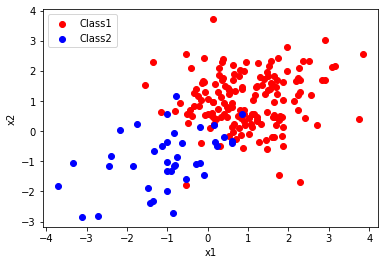

In [51]:
x_index=0
y_index=1
plt.scatter(class1_train[:,x_index],class1_train[:,y_index],label='Class1',c='red')
plt.scatter(class2_train[:,x_index],class2_train[:,y_index],label='Class2',c='blue')

# Prettify the graph
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')

# display
plt.show()


# Maximum likelihood estimate of parameters

We will model the likelihood, $P(\mathbf{x}|C_1)$ and $P(\mathbf{x}|C_2)$ as $\mathcal{N}(\mathbf{\mu_1},\Sigma_1)$ and $\mathcal{N}(\mathbf{\mu_2},\Sigma_2)$ respectively. The prior probability of the classes are called, $P(C_1)=\pi_1$ and $P(C_2)=\pi_2$.

The maximum likelihood estimate of the parameters as follows:
\begin{align*}
\pi_k &= \frac{\sum_{i=1}^N \mathbb{1}(t^i=k)}{N}\\
\mathbf{\mu_k} &= \frac{\sum_{i=1}^N \mathbb{1}(t^i=k)\mathbf{x}^i}{\sum_{i=1}^N \mathbb{1}(t^i=k)}\\
\Sigma_k &= \frac{\sum_{i=1}^N \mathbb{1}(t^i=k)(\mathbf{x}^i-\mathbf{\mu_k})(\mathbf{x}^i-\mathbf{\mu_k})^T}{\sum_{i=1}^N \mathbb{1}(t^i=k)}\\
\end{align*}

Here, $t^i$ is the target or class of $i^{th}$ sample. $\mathbb{1}(t^i=k)$ is 1 if $t^i=k$ and 0 otherwise.

Compute maximum likelihood values estimates of $\pi_1$, $\mu_1$, $\Sigma_1$ and $\pi_2$, $\mu_2$, $\Sigma_2$ 

Also print these values


In [56]:
#is a 2D array  
len_1 = class1_train.shape[0]
len_2 = class2_train.shape[0]
len_1_2= len_1+len_2

prior_1 = len_1/len_1_2 #value is one for the class 1 and zero for class 2
prior_2 = len_2/len_1_2 #value is one for class 2 and zero for class 1
print('Prior1 is:\n',prior_1)
print('Prior2 is:\n',prior_2)


miu_1= class1_train.mean(axis= 0)
miu_2= class2_train.mean(axis= 0)
print('Mean1 is: \n',miu_1)
print('Mean2 is: \n',miu_2)


fun_1= (class1_train-miu_1).T
fun_2= (class2_train-miu_2).T
sigma_1  = np.matmul(fun_1,fun_1.T)/len_1
sigma_2 = np.matmul(fun_2,fun_2.T)/len_2
print('Sigma1 is: \n',sigma_1)
print('Sigma2 is: \n',sigma_2)




Prior1 is:
 0.8040201005025126
Prior2 is:
 0.19597989949748743
Mean1 is: 
 [0.96998989 1.02894917]
Mean2 is: 
 [-1.02482819 -0.91492055]
Sigma1 is: 
 [[0.95527085 0.07775973]
 [0.07775973 0.81591945]]
Sigma2 is: 
 [[1.16715324 0.46947177]
 [0.46947177 0.91362912]]


# Visualize the likelihood
Now that you have the parameters, let us visualize how the likelihood looks like.

1. Use $\texttt{np.mgrid}$ to generate points uniformly spaced in -5 to 5 along 2 axes
1. Use $\texttt{multivariate_normal.pdf}$ to get compute the Gaussian likelihood for each class  
1. Use $\texttt{plot_surface}$ to plot the likelihood of each class.
1. Use $\texttt{contourf}$ to plot the likelihood of each class. 

You may find the code in the lecture notebook helpful.
 
For the plots, use $\texttt{cmap=cm.Reds}$ for class 1 and $\texttt{cmap=cm.Blues}$ for class 2. Use $\texttt{alpha=0.5}$ to overlay both plots together.

Text(0, 0.5, 'y')

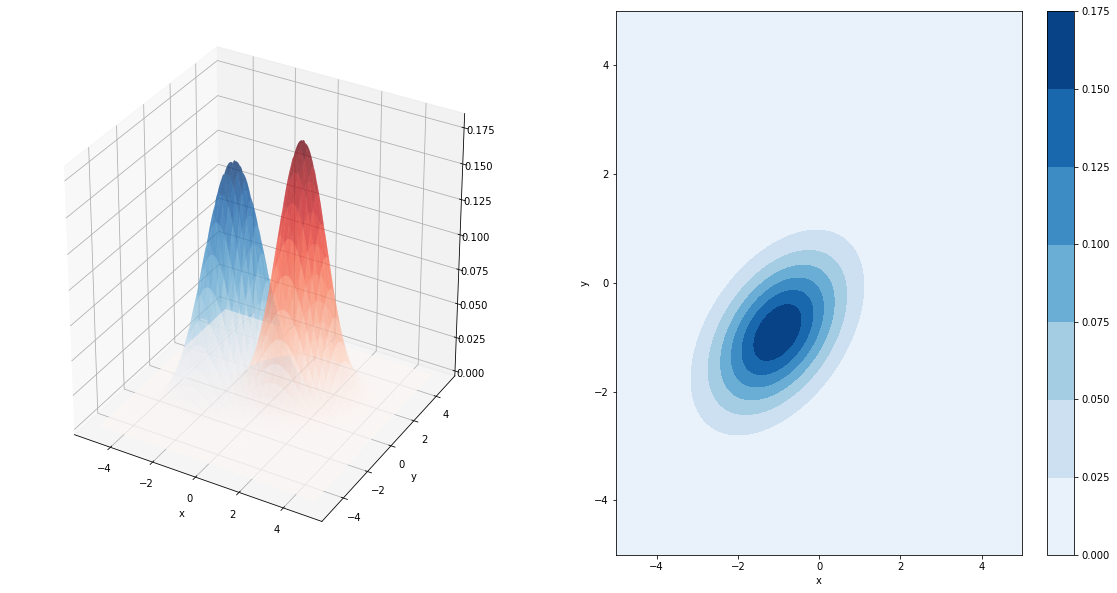

In [59]:
x, y = np.mgrid[-5:5:.01, -5:5:.01]
pos = np.empty(x.shape + (2,))   #alomg two axis
#numpy.empty()Return a new array of given shape and type, with random values.
pos[:, :, 0] = x
pos[:, :, 1] = y
rv_1 = multivariate_normal(mean= miu_1, cov =sigma_1)
rv_2 = multivariate_normal(mean= miu_2, cov =sigma_2)

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(121, projection='3d')

plt.xlabel('x')
plt.ylabel('y')

#to plot 2D
ax.plot_surface(x,y,rv_1.pdf(pos), cmap=cm.Reds,alpha= 0.5)
ax.plot_surface(x,y,rv_2.pdf(pos), cmap=cm.Blues,alpha=0.5)
plt.subplot(122)

plt.contourf(x, y, rv_1.pdf(pos), cmap=cm.Reds)
plt.contourf(x, y, rv_2.pdf(pos), cmap=cm.Blues)

plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')

#Visualize the posterior
Use the prior and the likelihood you've computed to obtain the posterior distribution for each class.

Like in the case of the likelihood above, make same similar surface and contour plots for the posterior.

Text(0, 0.5, 'y')

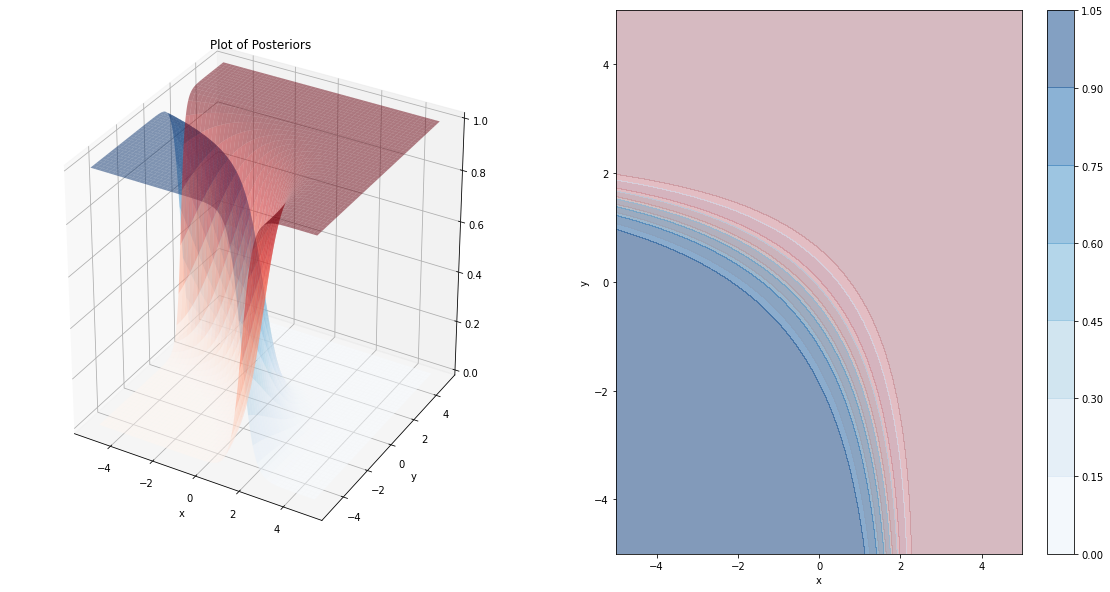

In [60]:
likelihood1 = rv_1.pdf(pos)  #pos contains all the data points
likelihood2 = rv_2.pdf(pos)

posterior1 = (likelihood1 * prior_1) / ((likelihood1 * prior_1) + (likelihood2 * prior_2))
posterior2 = (likelihood2 * prior_2) / ((likelihood1 * prior_1) + (likelihood2 * prior_2))

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='3d') # add 3d projection
plt.title("Plot of Posteriors")
plt.xlabel('x')
plt.ylabel('y')
# to plot 3d plot
ax.plot_surface(x,y,posterior1, cmap=cm.Reds, alpha = 0.5)
ax.plot_surface(x,y,posterior2, cmap=cm.Blues, alpha = 0.5)
plt.subplot(122)
# draw contour plot
plt.contourf(x, y, posterior1, cmap=cm.Reds, alpha = 0.5)
plt.contourf(x, y, posterior2, cmap=cm.Blues, alpha = 0.5)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')

# Decision boundary
1. Decision boundary can be obtained by $P(C_2|x)>P(C_1|x)$ in python. Use $\texttt{contourf}$ to plot the decision boundary. Use $\texttt{cmap=cm.Blues}$ and $\texttt{alpha=0.5}$
1. Also overlay the scatter plot of train data points from the 2 classes on the same plot. Use red color for class 1 and blue color for class 2 

Text(0, 0.5, 'y')

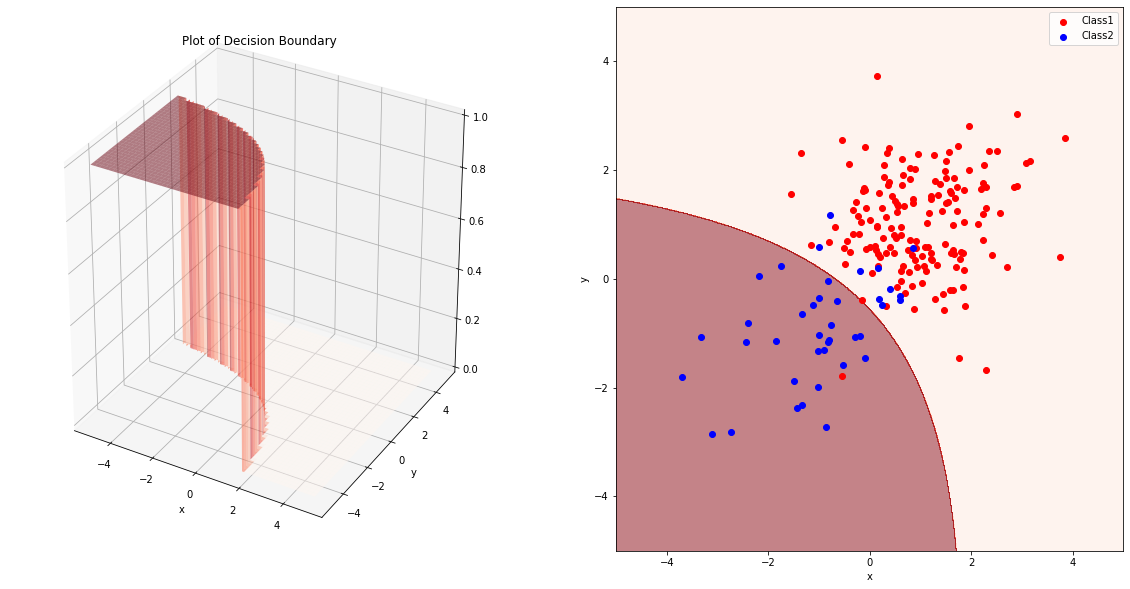

In [69]:
decision= posterior2>posterior1

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='3d') 

plt.title("Plot of Decision Boundary ")
plt.xlabel('x')
plt.ylabel('y')

ax.plot_surface(x,y,decision, cmap=cm.Reds, alpha = 0.5)
plt.subplot(122)
# draw contour plot
plt.contourf(x, y, decision, cmap=cm.Reds, alpha = 0.5)

x_index=0
y_index=1
plt.scatter(class1_train[:,x_index],class1_train[:,y_index],label='Class1',c='red')
plt.scatter(class2_train[:,x_index],class2_train[:,y_index],label='Class2',c='blue')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')


# Test Data
Now let's use our trained model to classify test data points

1. $\texttt{test_data}$ contains the $x1,x2$ features of different data points
1. $\texttt{test_label}$ contains the true class of the data points. 0 means class 1. 1 means class 2.  
1. Classify the test points based on whichever class has higher posterior probability for each data point
1. Use $\texttt{classification_report}$ to test the classification performance

In [0]:
test = pd.read_csv('https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L3/test').to_numpy()
test_data, test_label = test[:,:2], test[:,2]

In [79]:
likelihood1 = rv_1.pdf(test_data)  #pos contains all the data points
likelihood2 = rv_2.pdf(test_data)

posterior1 = (likelihood1 * prior_1) / ((likelihood1 * prior_1) + (likelihood2 * prior_2))
posterior2 = (likelihood2 * prior_2) / ((likelihood1 * prior_1) + (likelihood2 * prior_2))

decision= posterior2>posterior1
prediction=[]

for i in decision:
  if i== True:
    prediction.append(1)
  else:
     prediction.append(0)
prediction= np.array(prediction)   #to convert into array

print('Classification Report:\n', classification_report(test_label,prediction))
print('Accuracy score:\n',accuracy_score(test_label,prediction))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        40
         1.0       0.67      0.67      0.67         9

    accuracy                           0.88        49
   macro avg       0.80      0.80      0.80        49
weighted avg       0.88      0.88      0.88        49

Accuracy score:
 0.8775510204081632
